# Proyek Analisis Data: Air-quality-dataset
- **Nama:** Muhammad Faris Elsyad
- **Email:** muhammadfariselsyad@gmail.com
- **ID Dicoding:** rakuzan37

## Menentukan Pertanyaan Bisnis

- Apakah ada korelasi antara kadar PM2.5 dengan faktor-faktor lingkungan lainnya seperti PM10, SO2, NO2, CO, dan O3?
- Apakah terdapat perbedaan rata-rata PM2.5 yang signifikan pada masing-masing wilayah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Data Wrangling

### Gathering Data

In [2]:
#membuat variabel untuk menyimpan seluruh nama file pada folder data
file_list = os.listdir("data")

#membuat dictionary kosong untuk menyimpan seluruh dataframe untuk masing-masing wilayah
dfs = {}

#Iterasi semua nama file pada variabel file_list
for file_name in file_list:
    #mengecek apakah nama file tersebut berakhiran ".csv"
    if file_name.endswith(".csv"):
        #membuat path untuk semua dataframe
        file_path = os.path.join("data", file_name)
        with open(file_path, "r") as file:
            #mendefinisikan pola regex pada nama file, untuk setiap kota
            regex_pattern = r"_([A-Za-z]+)_\d{8}-\d{8}\.csv$"
            #membaca setiap dataframe pada setiap file, kemudian menyimpannya di dictionary dfs
            dfs["df_" + re.search(regex_pattern, file_name).group(1).lower()] = pd.read_csv(file_path)

In [3]:
#menggabungkan seluruh data yang terdapat di dictionary menjadi satu datafram
df = pd.concat([df for df in dfs.values()])

#mereset index gabungan dataframe
df.reset_index(inplace = True, drop = True)

### Assessing Data

In [4]:
#Melihat preview dataframe
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
#melihat nama variabel beserta jumlah "non-null" dan tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [6]:
#melihat statistik deskriptif variabel non-object
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [7]:
#Melihat apakah terdapat duplikasi pada data
df[df.duplicated()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


### Cleaning Data

- Menghapus variabel No. karena merupakan variabel index
- Menggabungkan variabel year, month, day dan hour menjadi satu variabel dengan tipe data "datetime"
- Dikarenakan terdapat missing-value, maka akan dilakukan pengisian dengan menggunakan modus untuk data kategorikal, dan interpolate pada variabel sisanya (karena merupakan data runtun waktu)
- Pada statistik deskriptif dapat dilihat terdapat nilai yang sangat tinggi pada beberapa variabel yang dirasa tidak masuk akal. Namun peneliti tidak menghapus ataupun mengisinya dengan cara lain dikarenakan mungkin bisa saja pada hari itu memang kondisinya seperti itu. Sehingga untuk outlier (pencilan) tidak akan dilakukan pembersihan data.
- Pada dataset tidak ditemukan data duplikat sehingga tidak perlu dilakukan apa-apa

In [8]:
#Menghapus variabel "No."
df.drop(["No"], inplace = True, axis = 1)

In [9]:
#Mengisi missing value pada variabel "wd" dan mengisi nya berdasarkan modus pada setiap stationnya
df["wd"] = df.groupby("station")["wd"].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [10]:
#Mengisi missing value pada variabel dengan tipe data selain object dengan menggunakan interpolate pada setiap station
df = df.groupby("station").apply(lambda group: group.interpolate()).reset_index(drop = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_19800\1763760313.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.groupby("station").apply(lambda group: group.interpolate()).reset_index(drop = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_19800\1763760313.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.groupby("station").apply(lambda group: group.interpolate()).reset_index(drop = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_19800\1763760313.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.groupby("station").apply(lambda group: group.interpolate()).reset_index(drop = True)
C:\Users\hp\A

In [11]:
df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])

In [12]:
df = df[['datetime', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']]

In [13]:
df.head()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  420768 non-null  datetime64[ns]
 1   PM2.5     420768 non-null  float64       
 2   PM10      420768 non-null  float64       
 3   SO2       420768 non-null  float64       
 4   NO2       420746 non-null  float64       
 5   CO        420768 non-null  float64       
 6   O3        420768 non-null  float64       
 7   TEMP      420768 non-null  float64       
 8   PRES      420768 non-null  float64       
 9   DEWP      420768 non-null  float64       
 10  RAIN      420768 non-null  float64       
 11  wd        420768 non-null  object        
 12  WSPM      420768 non-null  float64       
 13  station   420768 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 44.9+ MB


## Exploratory Data Analysis (EDA)

In [15]:
#Korelasi antara variabel bertipe data float
df.select_dtypes("float64").corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.878874,0.478223,0.664300,0.780165,-0.149508,-0.131607,0.019862,0.113045,-0.014452,-0.271425
PM10,0.878874,1.000000,0.460572,0.645576,0.691887,-0.110443,-0.096078,-0.018375,0.067674,-0.026505,-0.178200
SO2,0.478223,0.460572,1.000000,0.495821,0.522678,-0.165311,-0.320237,0.221235,-0.266121,-0.040028,-0.108536
NO2,0.664300,0.645576,0.495821,1.000000,0.694035,-0.465907,-0.277324,0.176706,-0.032627,-0.043669,-0.395709
CO,0.780165,0.691887,0.522678,0.694035,1.000000,-0.306979,-0.324057,0.188045,-0.060315,-0.013281,-0.290413
O3,-0.149508,-0.110443,-0.165311,-0.465907,-0.306979,1.000000,0.592248,-0.446725,0.312980,0.023361,0.294351
TEMP,-0.131607,-0.096078,-0.320237,-0.277324,-0.324057,0.592248,1.000000,-0.813312,0.820247,0.037647,0.032601
PRES,0.019862,-0.018375,0.221235,0.176706,0.188045,-0.446725,-0.813312,1.000000,-0.750271,-0.060952,0.065400
DEWP,0.113045,0.067674,-0.266121,-0.032627,-0.060315,0.312980,0.820247,-0.750271,1.000000,0.086259,-0.296771
RAIN,-0.014452,-0.026505,-0.040028,-0.043669,-0.013281,0.023361,0.037647,-0.060952,0.086259,1.000000,0.020975


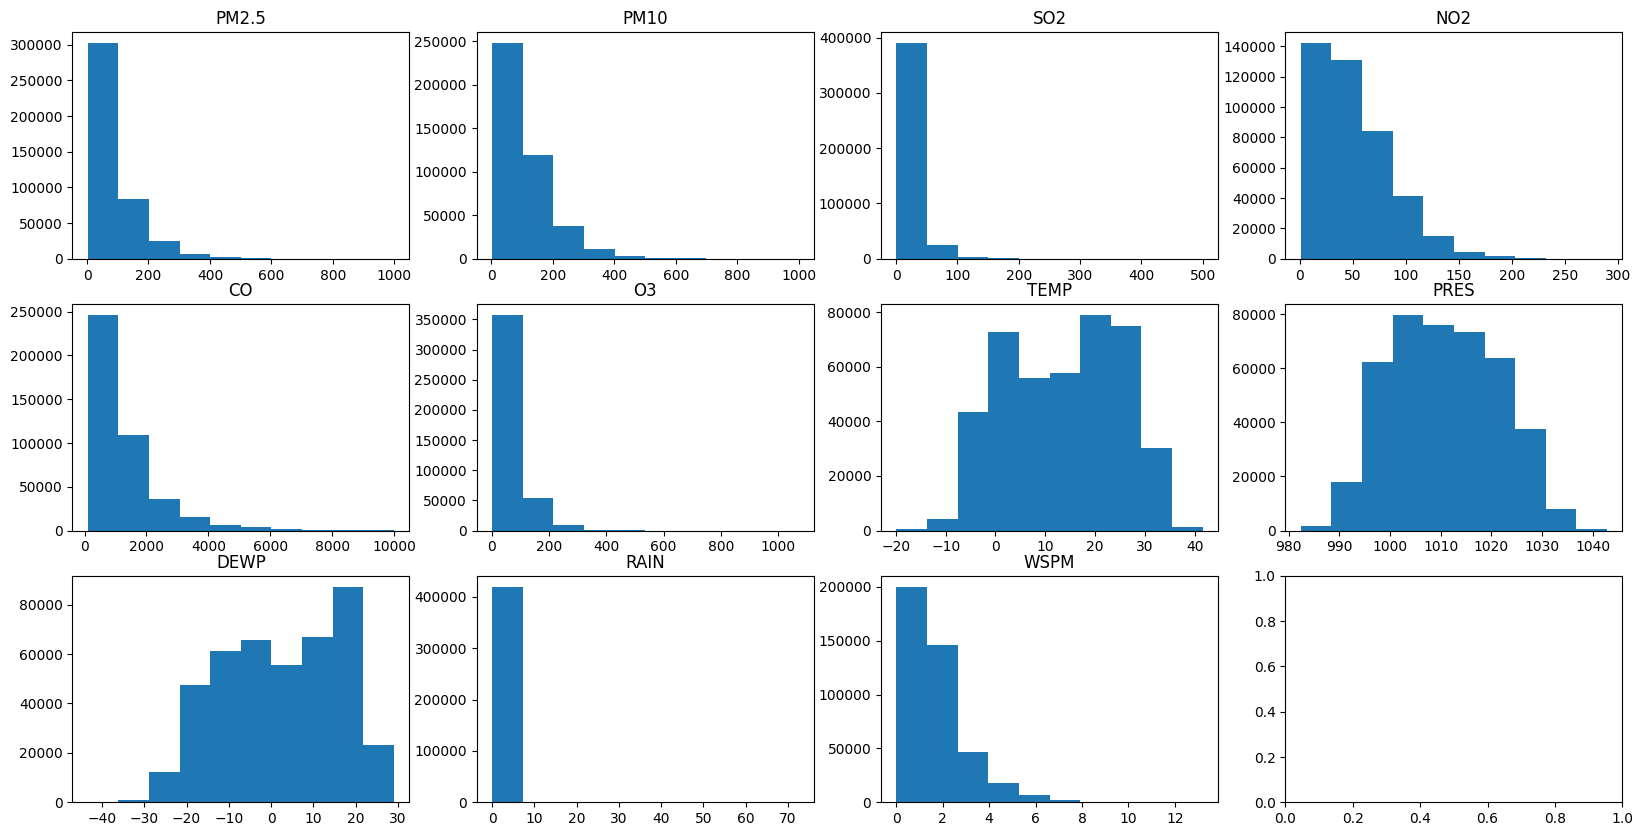

In [16]:
#Histgram variabel dengan tipe data float
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 10))

for i, column in enumerate(df.select_dtypes("float64").columns):
    row = i // 4
    col = i % 4
    axes[row, col].hist(df[column])
    axes[row, col].set_title(column)

<BarContainer object of 16 artists>

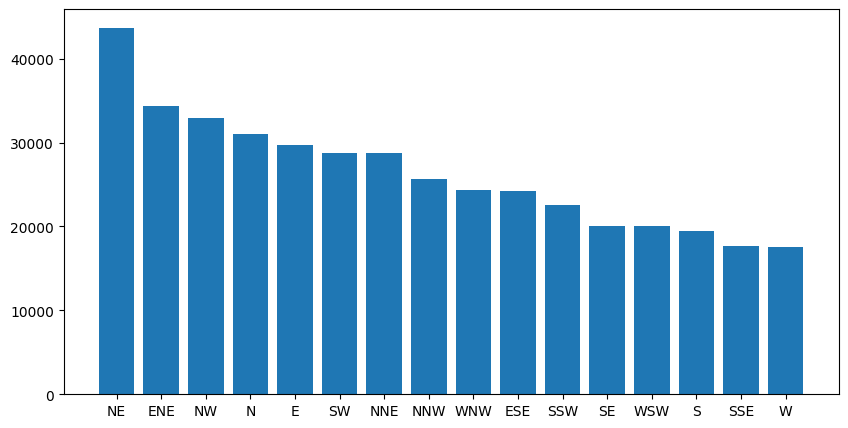

In [17]:
#barplot variabel dengan tipe data kategorik
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

axes.bar(df["wd"].value_counts().index, df["wd"].value_counts().values)

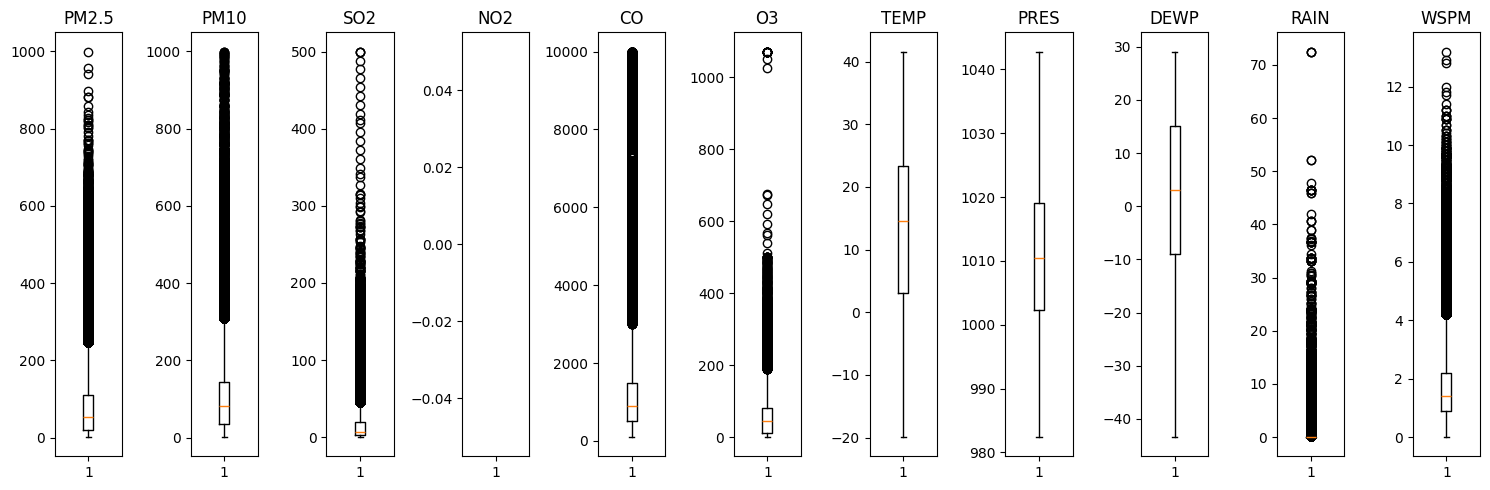

In [18]:
#boxplot variabel tipe data float
fig, axes = plt.subplots(nrows = 1, ncols = 11, figsize=(15, 5))

for i, column in enumerate(df.select_dtypes("float64").columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada korelasi antara kadar PM2.5 dengan faktor-faktor lingkungan lainnya seperti PM10, SO2, NO2, CO, dan O3?

In [19]:
#Korelasi antara variabel bertipe data float
df.select_dtypes("float64").corr()["PM2.5"]

PM2.5    1.000000
PM10     0.878874
SO2      0.478223
NO2      0.664300
CO       0.780165
O3      -0.149508
TEMP    -0.131607
PRES     0.019862
DEWP     0.113045
RAIN    -0.014452
WSPM    -0.271425
Name: PM2.5, dtype: float64

<Axes: >

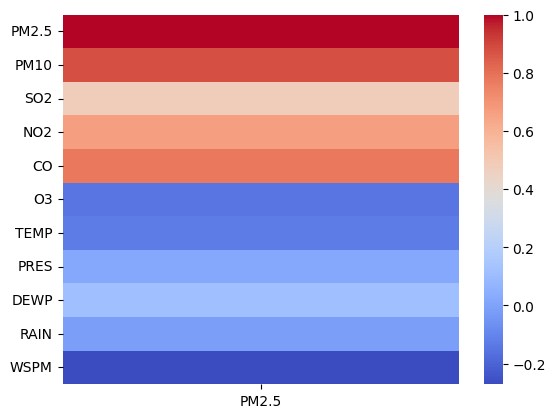

In [20]:
sns.heatmap(df.select_dtypes("float64").corr()[["PM2.5"]], cmap = "coolwarm")

dengan melihat tabel dan plot nya dapat dilihat apabila nilai korelasinya mendekati 1 atau -1, maka terdapat korelasi yang sangat kuat antara kedua variabel tersebut. Dengan kata lain variabel PM10, NO2, CO memiliki korelasi yang kuat dengan PM2.5. Nilai korelasi yang positif menunjukkan bahwa semakin tinggi kadar PM2.5, maka kadar PM10, NO2, dan CO juga memiliki kadar yang tinggi. 

### Pertanyaan 2: Apakah terdapat perbedaan rata-rata PM2.5 yang signifikan pada masing-masing wilayah?

In [21]:
df[["PM2.5", "station"]].groupby("station").mean()

,PM2.5
station,
Aotizhongxin,82.540623
Changping,70.986438
Dingling,66.845557
Dongsi,86.144243
Guanyuan,82.897522
Gucheng,84.074802
Huairou,69.501747
Nongzhanguan,85.079472
Shunyi,79.437962


C:\Users\hp\AppData\Local\Temp\ipykernel_19800\4275050777.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")


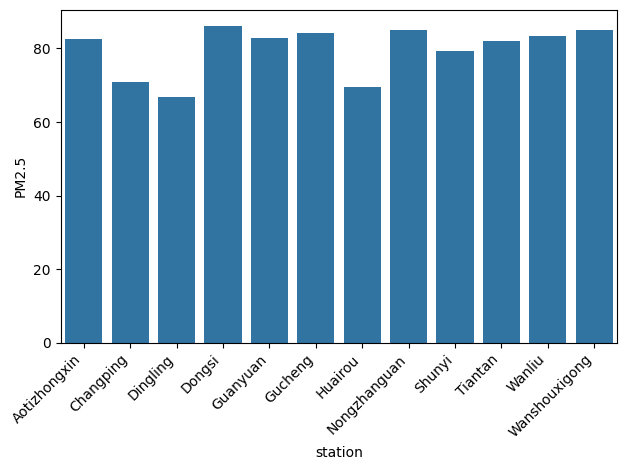

In [22]:
ax = sns.barplot(x = "station", y = "PM2.5", data = df[["PM2.5", "station"]].groupby("station").mean())
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")

plt.tight_layout()
plt.show()

dengan melihat sekilas dapat dilihat bahwa terdapat perbedaan kadar PM2.5 di masing-masing station, namun untuk lebih spesifiknya akan dilakukan uji ANOVA (Analisis of Variance) untuk mengetahui apakah perbedaan yang ada signifikan atau tidak

#### ANOVA

##### Hipotesis

- H0 = Tidak terdapat perbedaan kadar PM2.5 pada masing-masing station
- H1 = Terdapat perbedaan kadar PM2.5 pada masing-masing station

##### Tingkat Signifikansi

- alpha = 0.05

##### Statistik Uji

- P-Value = 0.00

In [23]:
df = df.rename(columns={df.columns[1]: "PM2_5"})
ols("PM2_5 ~ station", data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2_5   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     245.4
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:27:52   Log-Likelihood:            -2.4445e+06
No. Observations:              420768   AIC:                         4.889e+06
Df Residuals:                  420756   BIC:                         4.889e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   82.5406      0.431    191.542      0.000      81.696      83.385
station[T.Changping]       -11.5542      0.609    -18.959      0.000     -12.749     -10.360
station[T.Dingling]        -15.6951      0.609    -25.754      0.000     -16.890     -14.501
station[T.Dongsi]            3.6036      0.609      5.913      0.000       2.409       4.798
station[T.Guanyuan]          0.3569      0.609      0.586      0.558      -0.838       1.551
station[T.Gucheng]           1.5342      0.609      2.517      0.012       0.340       2.729
station[T.Huairou]         -13.0389      0.609    -21.395      0.000     -14.233     -11.844
station[T.Nongzhanguan]      2.5388      0.609      4.166      0.000       1.344       3.733
station[T.Shunyi]           -3.1027      0.609     -5.091      0.000      -4.297      -1.908
station[T.Tiantan]          -0.5075      0.609     -0.833      0.405      -1.702       0.687
station[T.Wanliu]            0.9270      0.609      1.521      0.128      -0.267       2.121
station[T.Wanshouxigong]     2.5269      0.609      4.146      0.000       1.332       3.721
==============================================================================
Omnibus:                   177135.658   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           902399.334
Skew:                           2.012   Prob(JB):                         0.00
Kurtosis:                       8.940   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Daerah Kritik

- H0 ditolak apabila p-value < alpha>

##### Kesimpulan

- Dari statistik uji diperoleh p-value sebesar 0.00 < 0.05 = alpha, sehingga H0 ditolak. Oleh karena itu dapat disimpulkan bahwa terdapat perbedaan kadar PM2.5 pada masing-masing station.

## Conclusion

- Korelasi yang mendekati 1 atau -1 menunjukkan hubungan yang sangat kuat. Jika nilai korelasi mendekati 1, itu menunjukkan hubungan positif yang kuat antara kedua variabel, sedangkan jika mendekati -1, itu menunjukkan hubungan negatif yang kuat. Dalam konteks ini, korelasi positif yang kuat antara PM2.5 dengan PM10, NO2, dan CO menunjukkan bahwa semakin tinggi kadar PM2.5, maka kadar PM10, NO2, dan CO juga cenderung memiliki kadar yang tinggi. Ini bisa menunjukkan adanya sumber polusi yang sama atau adanya keterkaitan dalam proses pembentukan polusi udara di lingkungan tersebut. Dengan demikian, jika kadar PM2.5 meningkat, kemungkinan besar juga akan diikuti oleh peningkatan kadar PM10, NO2, dan CO. Hal ini dapat memberikan petunjuk penting bagi penanganan masalah polusi udara dan perlunya upaya mitigasi untuk mengurangi emisi dari sumber-sumber polusi yang berkontribusi terhadap kedua jenis partikulat PM2.5 dan PM10, serta gas NO2 dan CO.

- Sebelum dilakukan uji ANOVA, secara visual dapat dilihat bahwa terdapat perbedaan dalam kadar PM2.5 di masing-masing stasiun pengukuran. Namun, untuk memastikan apakah perbedaan tersebut signifikan secara statistik, dilakukan uji ANOVA. Setelah melakukan uji ANOVA, diperoleh nilai p-value sebesar 0.00, yang lebih kecil dari tingkat signifikansi alpha (0.05). Oleh karena itu, berdasarkan hasil uji, hipotesis nol (H0) yang menyatakan tidak ada perbedaan antara stasiun-stasiun pengukuran dalam kadar PM2.5 ditolak. Dengan demikian, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam kadar PM2.5 di masing-masing stasiun pengukuran.